# Python Correlation project

_Set up, etc._

In [17]:

# import the needed libraries

from unicodedata import name
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure

%matplotlib inline
# Adjusts the size of the figures to be created
matplotlib.rcParams["figure.figsize"] = (12,8)

# Read in source data from CSV file into a pandas DataFrame
df = pd.read_csv('movies.csv')

# Examine some of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Cleaning Step #1: remove missing values from $ fields 

In [18]:
# Define a function to examine the contents of the DataFrame
def printDF(argDF):

    # Review data to determine any missing values
    for cols in argDF.columns:
        perc_missing = np.mean(argDF[cols].isnull())
        print('{} - {}%'.format(cols, perc_missing) )
    
# Call print function for current state of DataFrame
printDF(df)

# Replace null values for Budget with $0
df['budget'].fillna('0', inplace = True )

# Replace null values for Budget with $0
df['gross'].fillna('0', inplace = True )

print("\n")

# Reprint % of missing values and double-check
printDF(df)


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Data Cleaning Step #2: Correct data types for $ fields

In [19]:
# Examine data types for this data set
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget       object
gross        object
company      object
runtime     float64
dtype: object

In [20]:
# Change data type for certain columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Recheck data types
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

### Data Cleaning Step #3: Extract corrected release year

In [21]:
# Create a new column for Correct Release Year

df['strRelYear'] = df['released'].str.extract('(, \d\d\d\d)')
df['correctYear'] = df['strRelYear'].astype(str).str[2:6]

# Remove unneeded columns from the DataFrame
del df['strRelYear']
del df['year']

# print all data types in the DataFrame
print(df.dtypes)

# print the head records of the DataFrame
df.head()


name            object
rating          object
genre           object
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
correctYear     object
dtype: object


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [22]:
# Set print option for amount of data to display - set to None for all data
pd.set_option('display.max_rows',50)

# Sort DF by gross $
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


### Data Cleaning Step #4: Check for duplicate records 

In [23]:
# Check for duplicate records
df.duplicated().sum()
    
# Note that no duplicate records were found of the entire record

# How to check for duplicates of a subset of data
# df.duplicated(subset=['company','correctYear','director']).sum()

0

### Begin checking for correlation between certain values in the data

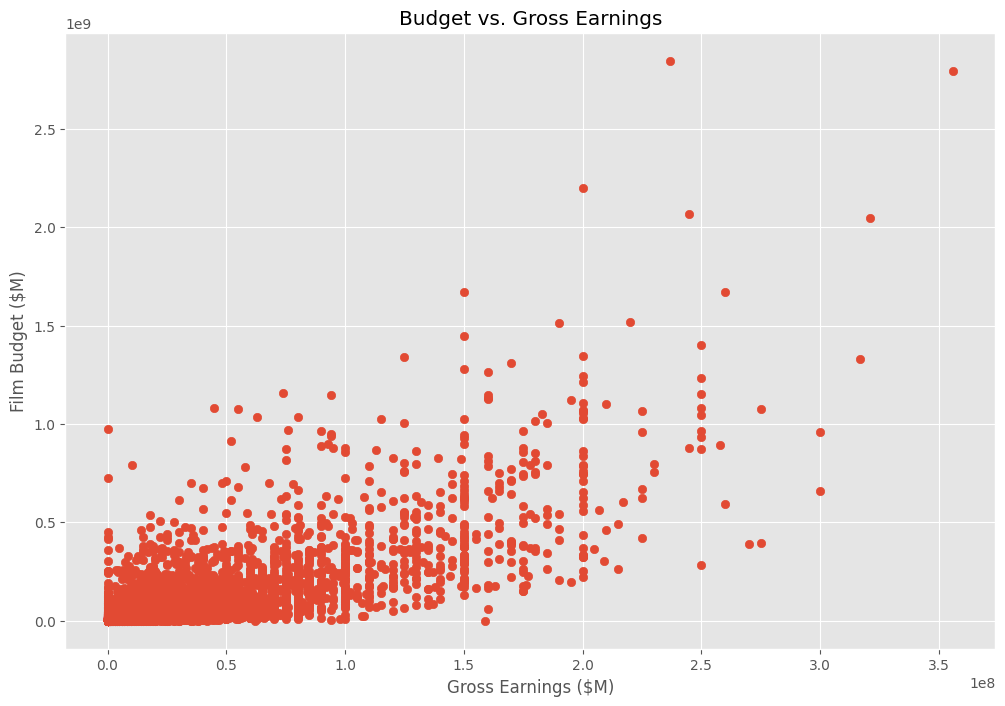

In [24]:
# Use matplotlib to create charts to examine potential correlations

plt.scatter(x=df['budget'],y=df['gross'])

# Set Titles, etc.
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings ($M)')
plt.ylabel('Film Budget ($M)')

plt.show()

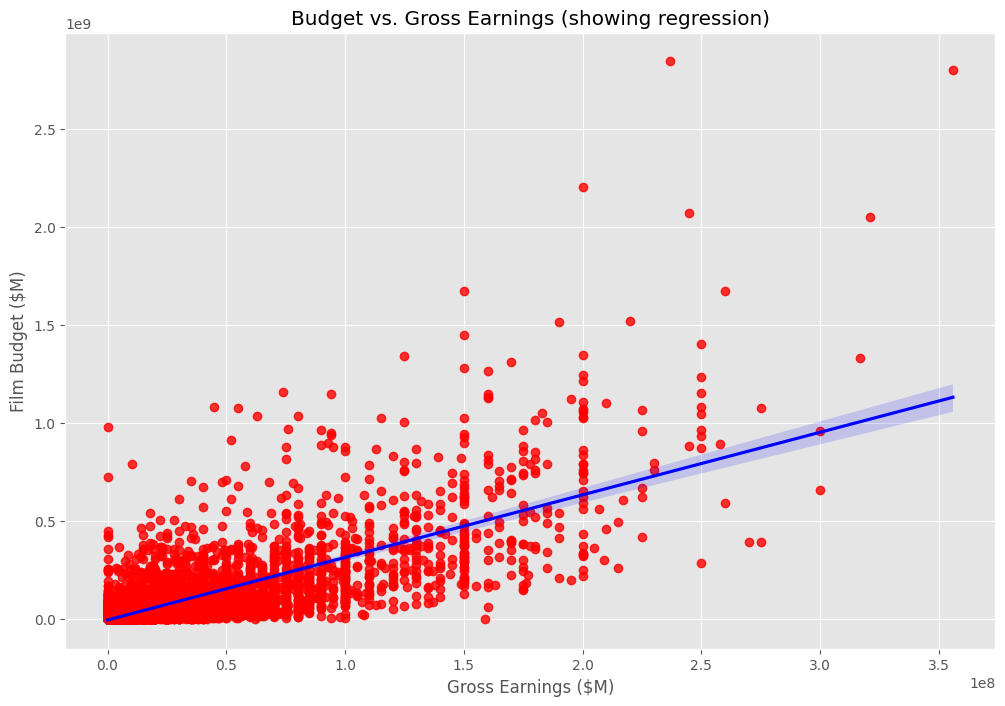

In [25]:
# Note that the scatter plot is not very conclusive on correlation
# Move to a linear regression analysis

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

# Set Titles, etc.
plt.title('Budget vs. Gross Earnings (showing regression)')
plt.xlabel('Gross Earnings ($M)')
plt.ylabel('Film Budget ($M)')

plt.show()

In [26]:
# examine the correlation data generated for this DataFrame
print("Using Pearson method")
print(df.corr(method='pearson'))

# print("\nUsing Kendall method")
# print(df.corr(method='kendall'))

# print("\nUsing Spearman method")
# print(df.corr(method='spearman'))

Using Pearson method
            score     votes    budget     gross   runtime
score    1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.399451  0.309212  0.269510  0.245235  1.000000


### Note the relatively high correlation between Gross \$ and Budget \$ in the following heatmap

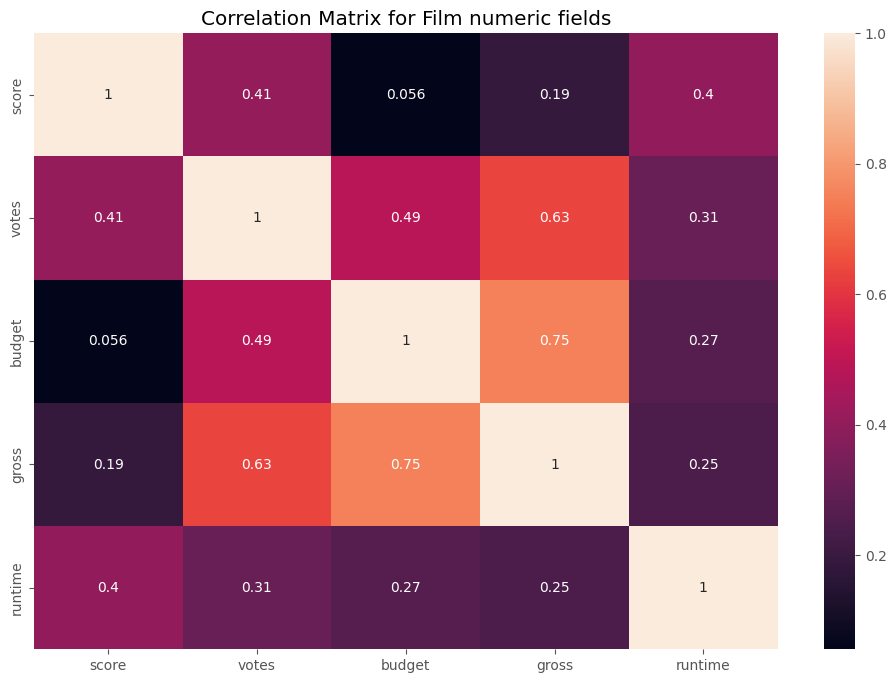

In [27]:
# Visualize the correlation data 
correlation_matrix = df.corr(method='pearson')

# Use seaborn heatmap
sns.heatmap(correlation_matrix, annot=True)

# Set Titles, etc.
plt.title('Correlation Matrix for Film numeric fields')

plt.show()

### Expand the Correlation Matrix to all fields by converting text fields to unique numeric values

In [28]:
# Assign a numeric value to unique text values to test correlation by all fields
df_AllNumerics = df

for col_name in df_AllNumerics.columns:
    if (df_AllNumerics[col_name]).dtype == 'object':
        df_AllNumerics[col_name] = df_AllNumerics[col_name].astype('category')
        df_AllNumerics[col_name] = df_AllNumerics[col_name].cat.codes

print(df_AllNumerics)


      name  rating  genre  released  score      votes  director  writer  star  \
0     6587       6      6      1705    8.4   927000.0      2589    4014  1047   
1     5573       6      1      1492    5.8    65000.0      2269    1632   327   
2     5142       4      0      1771    8.7  1200000.0      1111    2567  1745   
3      286       4      4      1492    7.7   221000.0      1301    2000  2246   
4     1027       6      4      1543    7.3   108000.0      1054     521   410   
...    ...     ...    ...       ...    ...        ...       ...     ...   ...   
7663  3705      -1      6      2964    3.1       18.0      1500    2289  2421   
7664  1678      -1      4      1107    4.7       36.0       774    2614  1886   
7665  4717      -1      6       193    5.7       29.0      2061    2683  2040   
7666  2843      -1      6      2817    NaN        NaN      1184    1824   450   
7667  5394      -1     10       391    5.7        7.0      2165    3344  2463   

      country    budget    

### Note the additional fields in the following heatmap.  Budget \$ to Gross \$ is still the most significant correlation

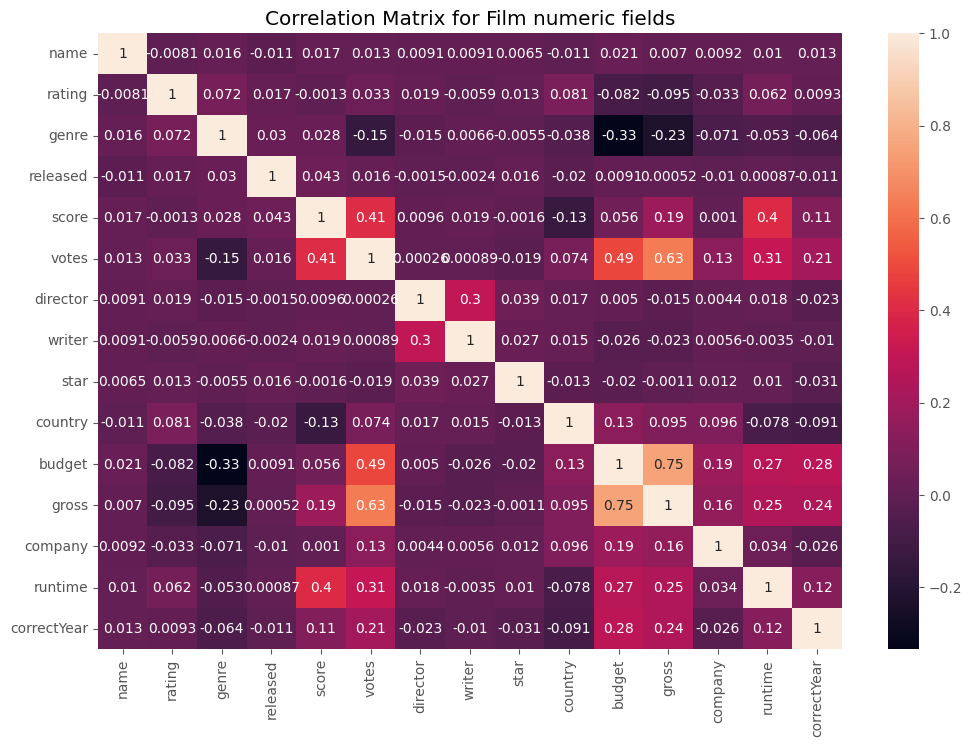

In [29]:
# Visualize the correlation data 
correlation_matrix = df_AllNumerics.corr(method='pearson')

# Rerun the seaborn heatmap
sns.heatmap(correlation_matrix, annot=True)

# Set Titles, etc.
plt.title('Correlation Matrix for Film numeric fields')

plt.show()

### The following matrix focuses on the values with the most signficant correlation

In [30]:
# Unstack and sort the latest matrix
corr_pairs = correlation_matrix.unstack().sort_values()

# Filter to only entries with high correlation but less than 1
high_corr = corr_pairs[(corr_pairs > .5) & (corr_pairs < 1)]

print(high_corr)


votes   gross     0.632834
gross   votes     0.632834
        budget    0.750157
budget  gross     0.750157
dtype: float64
